#Topic 17: Testing Unif(0,1) Random Number Generators
### Henri S. and Ryan T.

## Abstract
In this project, we test the Linear Congruential, Combined, Shuffle, XOR, Mid-Square, Mersenne Twister, Linear Feedback Shift Register, RCARRY, and Xorshift generators to analyze their quality and efficiency. We utilize Box-Muller Plots, Goodness-of-Fit Tests, Kolmogorov-Smirnov-Tests, Run Test Up and Down, and Correlation tests to see which generator is producing numbers that are approximately independent, identically distributed uniforms. We also calculate the computational efficiency of these generators to better understand the randomness metrics per unit time. Finally, we determine that Mersenne Twister is doing the best job and warrants being the standard random generator in programming languages like Python and R.

## Background information
The evaluation and validation of uniform random number generators (RNG), especially those that adhere to the Unif(0,1) distribution, is central to computational statistics and simulation science. These generators play a critical role in various applications, such as cryptography, security algorithms, and stochastic simulation models. Given the diverse implementations of these generators, the search for an optimal balance between statistical robustness and computational efficiency becomes essential.

This project evaluates several uniform random number generators, including the Linear Congruential, Combined, Shuffle, XOR, Mid-Square, Mersenne Twister, Linear Feedback Shift Register, RCARRY, and Xorshift models. Our objective is to analyze and compare their performance in producing independent, identically distributed uniforms random numbers and their computational efficiency.
For that, we employ statistical hypothesis tests like the χ2 goodness-of-fit test, von Neumann test for independence, and runs tests. These tests help assess whether the sequences produced by the generators deviate from the expected uniform distribution, providing a measure of their reliability for practical applications. Additionally, we address the computational aspect, crucial for time-critical applications requiring large sequences of random numbers. By quantifying the time efficiency of each generator, we aim to identify models with an optimal trade-off between statistical robustness and computational efficiency.

### Research Questions
We aim to answer the following two questions:
1.	How do we know if a particular generator is doing a good job?
2.	What is the computational cost of the generator's implementation?




# Install the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import decimal
import matplotlib.pyplot as plt

#Linear Congruential Generator

See

*   [M6L3: Linear Congruential Generators](https://docs.google.com/document/d/1bn6QCK_yfnwrRXos1OVkX5tzesXxO6CVbkKySQbPhRQ/edit)
*   [M6L5 Generalization of LCGS](https://docs.google.com/document/d/1b_VVDG-DZS6XYc82G8EWvKlkWV8uIomsiM4Z9O8dy2o/edit)


The Linear Congruential Generator is one of the simple methods introduced to generate random numbers using the linear equation with parameters:
*   seed = the set seed
*   a = multiplier
*   c = increment (when c = 0, then this is the Lehmer RNG)
*   m = modulus
*   n = number of random integers to return

This code is adapted from the [M6L5 Generalization of LCGs Notebook](https://colab.research.google.com/drive/11HecWk1IPx_5tUtqRXXGz_26DbSaa4yA#scrollTo=gEoF41fYNVVD)

In [ ]:
def LCG_island(n):
    X = np.zeros(n)
    X[0] = 123456
    for i in range(1, n):
        X[i] = (16807 * X[i-1]) % (2**31 - 1)
    return X

# Combined Generator

See

*   [M6L3: Linear Congruential Generators](https://docs.google.com/document/d/1bn6QCK_yfnwrRXos1OVkX5tzesXxO6CVbkKySQbPhRQ/edit)
*   [M6L5 Generalization of LCGS](https://docs.google.com/document/d/1b_VVDG-DZS6XYc82G8EWvKlkWV8uIomsiM4Z9O8dy2o/edit)

This code is implemented from the [M6L5 Generalization of LCGs Notebook](https://colab.research.google.com/drive/11HecWk1IPx_5tUtqRXXGz_26DbSaa4yA#scrollTo=gEoF41fYNVVD)

In [ ]:
def LCG(seed, a, c, m, n):
    X = np.zeros(n)
    X[0] = seed
    for i in range(1, n):
        X[i] = (a * X[i-1] + c) % m
    return X

def X_generator(n):
    return LCG(123, 40014, 0, 2147483563, n)

def Y_generator(n):
    return LCG(456, 40692, 0, 2147483399, n)

def combined_generator(n):
    X = X_generator(n)
    Y = Y_generator(n)
    Z = (X + Y) % 2**32
    return Z

# Shuffle Generator

See

*   [M6L5 Generalization of LCGS](https://docs.google.com/document/d/1b_VVDG-DZS6XYc82G8EWvKlkWV8uIomsiM4Z9O8dy2o/edit)

This code is implemented from the [M6L5 Generalization of LCGs Notebook](https://colab.research.google.com/drive/11HecWk1IPx_5tUtqRXXGz_26DbSaa4yA#scrollTo=gEoF41fYNVVD)

In [ ]:
def shuffle_generator(n):
    X = X_generator(n)
    Y = Y_generator(n)
    indices = np.argsort(Y)
    Z = X[indices]
    return Z

# XOR Generator

See

*   [M6L5 Generalization of LCGS](https://docs.google.com/document/d/1b_VVDG-DZS6XYc82G8EWvKlkWV8uIomsiM4Z9O8dy2o/edit)

This code is implemented from the [M6L5 Generalization of LCGs Notebook](https://colab.research.google.com/drive/11HecWk1IPx_5tUtqRXXGz_26DbSaa4yA#scrollTo=gEoF41fYNVVD)

In [ ]:
def XOR_generator(n):
    X = X_generator(n)
    Y = Y_generator(n)
    Z = np.bitwise_xor(X.astype(int), Y.astype(int))
    return Z

# Mid-Square Generator (von Neumann)

See [M6L2 Some Lousy Generators](https://docs.google.com/document/d/1BjDTGncC6bxDWH9XaLu7tuxqAjbHYmHo-youYWt6iP8/edit)

This code is implemented from [M6L2 Some Lousy Generators Notebook](https://colab.research.google.com/drive/1OXsXjqf7aTnXxgP-jdmmU1ISRu7sjj-w)

In [ ]:
def mid_square(n, seed = 123456):
    result = np.zeros(n)
    x = seed
    for i in range(n):
        x = int(str(x**2).zfill(12)[3:9])
        result[i] = x  / 1e6
    return list(result)

# Mersenne Twister Generator

Mersenne Twister is the the Random Number Generator used in Python, so we just need to call the random function from Numpy.

In [ ]:
def mersenne_generator(n):
  rng = np.random.RandomState(123456)
  return list(rng.uniform(0.0, 1.0, n))

# Linear-Feedback Shift Register Generator

The Linear-Feedback Shift Register (LFSR) Generator was coded with the help of [Wikipedia](https://en.wikipedia.org/wiki/Linear-feedback_shift_register) and this [Stackoverflow thread](https://stackoverflow.com/questions/3735217/linear-feedback-shift-register).



In [ ]:
class LFSR:
    def __init__(self, state, taps):
        self.state = state
        self.taps = taps

    def shift(self):
        feedback_bit = sum(self.state[i] for i in self.taps) % 2
        self.state = self.state[1:] + [feedback_bit]
        return feedback_bit

def generate_lsfr(n):
    # Initial state and taps
    initial_state = [1, 0, 0, 0, 1]
    taps = [0, 2, 3, 4]

    # Create an instance of the LFSR
    lfsr = LFSR(initial_state, taps)

    # Generate a list of random numbers between 0 and 1
    results = []
    for _ in range(n):
        binary_value = ''
        for _ in range(10):
            binary_value += str(lfsr.shift())
        decimal_value = int(binary_value, 2) / 1023
        results.append(decimal_value)

    return results

# RCARRY Generator

In [ ]:
def generate_rcarry(n, seed=123456, a=25214903917, c=11, m=2**48, carry_init=1):
    state = seed  # Initialize the state with the seed
    carry = carry_init  # Initialize the carry
    numbers = []  # List to hold the generated numbers

    for _ in range(n):
        state = (a * state + c + carry) % m  # Update the state with carry
        carry = 1 if state < c + carry else 0  # Update carry
        numbers.append(state / m)  # Append the new number to the list

    return numbers

# Example usage: Generate 10 random numbers
random_numbers = generate_rcarry(n=10)
print(random_numbers)

[0.059353177164027215, 0.35962478609272, 0.4996119580127001, 0.07447093104562796, 0.9250414511580516, 0.19251913174762691, 0.20067695020433263, 0.7588407064427436, 0.26218262282152693, 0.15185307691495709]


# Xorshift Generator


In [ ]:
def generate_xorshift_sequence(n, seed = 123456):
    """
    Parameters:
    - seed: The initial seed for the algorithm. Should be a 32-bit integer.
    - n: The number of random numbers to generate.

    Returns:
    - A list of generated random numbers.
    """
    def xorshift32(state):
        """32-bit XORShift random number generator. Returns the next state and a random number."""
        x = state
        x ^= (x << 13) & 0xFFFFFFFF
        x ^= (x >> 17) & 0xFFFFFFFF
        x ^= (x << 5) & 0xFFFFFFFF
        return x & 0xFFFFFFFF, x / 0xFFFFFFFF

    state = seed
    random_numbers = []
    for _ in range(n):
        state, rand_num = xorshift32(state)
        random_numbers.append(rand_num)

    return random_numbers

# Example usage:
seed = 123456  # Initial seed
n = 10  # Number of random numbers to generate
random_numbers = generate_xorshift_sequence(n, seed)
print(random_numbers)


[0.7088385160800159, 0.0867218638506536, 0.13064920882011047, 0.6872664675319722, 0.5008305829253119, 0.9389122223804967, 0.37033124742338697, 0.3544578865064443, 0.7148940453107687, 0.06783636940359984]


# Box-Muller Plot

See

*   [M6L5 Generalization of LCGS](https://docs.google.com/document/d/1b_VVDG-DZS6XYc82G8EWvKlkWV8uIomsiM4Z9O8dy2o/edit)

This code is implemented from the [M6L5 Generalization of LCGs Notebook](https://colab.research.google.com/drive/11HecWk1IPx_5tUtqRXXGz_26DbSaa4yA#scrollTo=gEoF41fYNVVD)

In [ ]:
def box_muller(n, rng):
    random_numbers = rng(n * 2)
    print(random_numbers)
    uniform_random_numbers = random_numbers / np.max(random_numbers)

    u1 = uniform_random_numbers[::2]
    u2 = uniform_random_numbers[1::2]
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return pd.DataFrame({'x': z0, 'y': z1})

# 10,000 Random Numbers using the 9 Generators

In [ ]:
n = int(10000)

# Desert Island
x_lcg = box_muller(n, LCG_island)

# Combined Generator
cg = box_muller(n, combined_generator)

# Shuffle Generator
sg = box_muller(n, shuffle_generator)

# Xor Generator
xorg = box_muller(n, XOR_generator)

# Mid-Square Generator
msg = box_muller(n, mid_square)

# Mersenne Twister
mtg = box_muller(n, mersenne_generator)

# Linear Feedback Shift Register
lfsr = box_muller(n, generate_lsfr)

# RCARRY
rc = box_muller(n, generate_rcarry)

# XORSHIFT
xorshift = box_muller(n, generate_xorshift_sequence)

[1.23456000e+05 2.07492499e+09 2.77396911e+08 ... 1.94684454e+09
 1.55525405e+09 2.13140113e+09]
[5.79000000e+02 2.34772740e+07 2.81262881e+09 ... 2.83347012e+09
 2.67648850e+09 2.68989181e+09]
[1.23000000e+02 1.86936745e+09 1.90639180e+09 ... 1.26015105e+09
 1.22019797e+09 1.42167055e+09]
[       435   22035418  391457924 ... 1192896786 1583867525  525565404]
[0.241383, 0.265752, 0.624125, 0.532015, 0.03996, 0.596801, 0.171433, 0.389273, 0.533468, 0.588107, 0.869843, 0.626844, 0.9334, 0.23556, 0.488513, 0.644951, 0.961792, 0.043851, 0.92291, 0.762868, 0.967585, 0.220732, 0.722615, 0.172438, 0.734863, 0.023628, 0.558282, 0.678791, 0.757221, 0.383642, 0.181184, 0.827641, 0.989624, 0.355661, 0.494746, 0.773604, 0.463148, 0.506069, 0.105832, 0.200412, 0.164969, 0.21477, 0.126152, 0.914327, 0.993862, 0.761675, 0.148805, 0.142928, 0.428413, 0.537698, 0.119139, 0.194101, 0.675198, 0.892339, 0.26889, 0.301832, 0.102556, 0.517733, 0.047459, 0.252356, 0.68355, 0.240602, 0.889322, 0.893619, 0.55

# Vizualing the Box Muller Plots

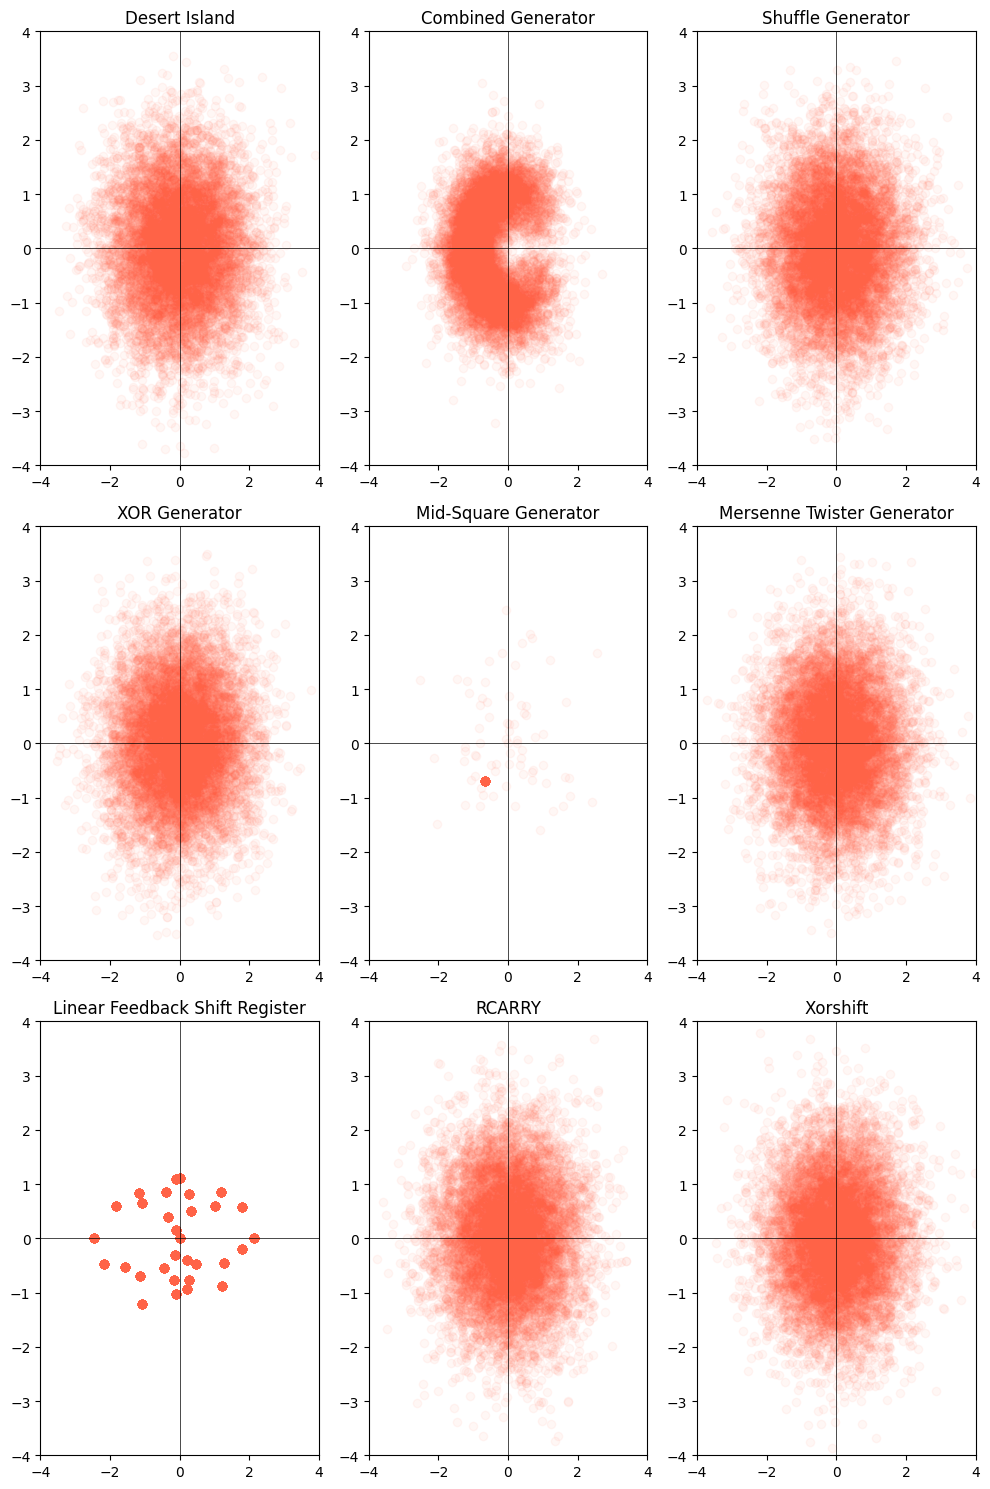

In [ ]:
colors = ["tomato", "tomato", "tomato", "tomato", "tomato", 'tomato', 'tomato', 'tomato', 'tomato']
titles = ["Desert Island", "Combined Generator", "Shuffle Generator",
            "XOR Generator", "Mid-Square Generator", 'Mersenne Twister Generator',
          'Linear Feedback Shift Register', 'RCARRY', 'Xorshift']

datasets = [x_lcg, cg, sg, xorg, msg, mtg, lfsr, rc, xorshift]

fig, axs = plt.subplots(3, 3, figsize=(10, 15))

for ax, data, color, title in zip(axs.flatten(), datasets, colors, titles):
    ax.scatter(data['x'], data['y'], color=color, alpha=0.05)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Goodness-of-Fit Test

See:
*   [M6L8 Choosing a Good Generator -- Goodness-of-Fit Tests](https://docs.google.com/document/d/1j3QjBVFRrFvEncvTm-yrLPDmQgBQ1GmRYwfQvqYSoPA/edit)

This code is implemented from [M6L8 Choosing a Good Generator -- Goodness-of-Fit Tests](https://colab.research.google.com/drive/1avQXU_qnqEW_WrKr4rIXQ_a_1-ly007p)

In [ ]:
from scipy.stats import chi2

def table_cut(data, breaks):
    # Determine the bin edges
    min_val = np.min(data)
    max_val = np.max(data)
    bin_edges = np.linspace(min_val, max_val, breaks + 1)

    # Use np.digitize to assign data to bins
    bins = np.digitize(data, bin_edges)

    # Count the occurrences in each bin
    counts = np.bincount(bins, minlength=breaks)
    counts[1] = counts[0] + counts[1]
    counts[breaks] = counts[breaks] + counts[breaks + 1]
    print(counts)

    return counts[1:(breaks + 1)]

def chi_sq_gof_test(rng_func, seed, n, k, alpha):
    # Set seed for reproducibility
    np.random.seed(seed)

    # Generate data
    print(n)
    data = rng_func(n)

    # Perform Chi-Square GoF Test
    observed = table_cut(data, k)  # observed counts
    print("Observed:")
    print(observed)
    expected = np.full(k, n/k)  # expected counts
    print("\nExpected:")
    print(expected)
    print("\n(Observed - Expected)^2 / Expected:")
    print(((observed - expected)**2) / expected)
    chi_sq_stat = np.sum(((observed - expected)**2) / expected)
    print("\nChi^2 Test Stat:")
    print(chi_sq_stat)

    # Compute critical value
    chi_sq_critical = chi2.ppf(1 - alpha, df=k - 1)

    # Decide to reject or not reject H_0
    if chi_sq_stat > chi_sq_critical:
        print("\nReject H_0: The data does not follow a Uniform(0,1) distribution")
        return chi_sq_stat
    else:
        print("\nFail to reject H_0: The data follows a Uniform(0,1) distribution")
        return chi_sq_stat

# Run Test Up and Down
See:
*   [M6L9 Choosing a Good Generator -- Independence Tests 1](https://docs.google.com/document/d/1NPFNuqd2lxVaPSdyBDQ0nQUHqkrPBpxOgUzP-EmD-sg/edit)

This code is directly translating the Run Test - Up and Down into Python. It returns true if the expected number of runs in n trials is random.

In [ ]:
def runs_up_and_down_test(data):
    # Initialize variables
    runs_up = 0
    runs_down = 0
    n = len(data)

    # Get what A is
    A = get_runs(data)

    # Calculate expected runs
    mean = (2 * n - 1) / 3
    variance = (16 *n - 29)/90

    # Perform the test
    if (abs(A - mean) / (variance ** 0.5)) < 1.96:
        return True
    else:
        return False

In [ ]:
def get_runs(numbers):
    symbols = []
    runs = []

    # Determine symbols
    for i in range(1, len(numbers)):
        if numbers[i] > numbers[i - 1]:
            symbols.append('+')  # Going up
        elif numbers[i] < numbers[i - 1]:
            symbols.append('-')  # Going down

    # Group runs
    current_run = symbols[0]
    for symbol in symbols[1:]:
        if symbol == current_run[-1]:
            current_run += symbol
        else:
            runs.append(current_run)
            current_run = symbol
    runs.append(current_run)  # Append the last run

    return len(runs)

# Kolmogorov-Smirnov Test

This code cell is implementing the Kolmogorov-Smirnov Test using the Scipy package's stats.

The null hypothesis is that the sample is generated from a uniform distribution, so a small p-value less than 0.05 would allow us to reject the null hypothesis.

In [ ]:
import scipy.stats as stats

def kolmogorovSmirnov(nums):
    # Normalize the data to range [0, 1]
    min_val = min(nums)
    max_val = max(nums)
    scaled_nums = [(x - min_val) / (max_val - min_val) for x in nums]

    ks_test_result = stats.kstest(scaled_nums,'uniform', args=(0, 1))

    # Get p-value
    p_value = ks_test_result.pvalue

    # Check if p-value less than 0.05
    reject_null = p_value < 0.05

    # Return the p-value and whether the test is significant
    return p_value, reject_null

# Correlation Test

See:
*   [M6L10 Choosing a Good Generator -- Independent Tests II](https://docs.google.com/document/d/1VeyXAxpNapVBcVn2slD8kNmSz8NWTc7asj6mKpWk4Vc/edit)

This code is implemented from [M6L10 Choosing a Good Generator -- Independence Tests II](https://colab.research.google.com/drive/1ZZhdSZuQKO1ltQpL4tfhy95j9hordd-6)

In [ ]:
def correlation(nums):
    # Normalize the data to range [0, 1]
  min_val = min(nums)
  max_val = max(nums)
  scaled_nums = [(x - min_val) / (max_val - min_val) for x in nums]

  nums = scaled_nums

  R_k = 0
  R_k1 = 0
  _sum = 0

  for i in nums:
      R_k1 = i
      _sum = _sum + (R_k * R_k1)
      R_k = i

  rho_hat = (12 / (len(nums) - 1)) * _sum - 3
  var_rho = (13 * len(nums) - 19) / ((len(nums) - 1) ** 2)

  Z_0 = rho_hat / np.sqrt(var_rho)

  return rho_hat, var_rho, Z_0

# Check Test Functions

In [ ]:
results = [X_generator(n), combined_generator(n), shuffle_generator(n),
           XOR_generator(n), mid_square(n), mersenne_generator(n),
           generate_lsfr(n), generate_rcarry(n), generate_xorshift_sequence(n)]

generators = [X_generator, combined_generator, shuffle_generator,
              XOR_generator, mid_square, mersenne_generator,
              generate_lsfr, generate_rcarry, generate_xorshift_sequence]

In [ ]:
import pandas as pd

results_df = pd.DataFrame(columns=['Generator', 'Chi-squared', 'Runs Test Up Down Passed',
                                   'KS P-Value', 'KS Test Passed', 'rho_hat',
                                   'var_rho', 'Z_0'])

for generator_results, title, generator in zip(results, titles, generators):
    #print("current generator:", title)
    # Chi-Squared Test
    chi_squared_result = chi_sq_gof_test(generator, 1234, n, 5, 0.05)

    # Runs Test Up Down
    runs = runs_up_and_down_test(generator_results)
    #print("Runs Up and Down Test passed:", runs)

    # Kolmogorow-Smirnov test
    ks_p_value, ks_test_passed = kolmogorovSmirnov(generator_results)
    #print("Kolmogorov-Smirnov p-value:", ks_p_value)
    #print("Kolmogorov-Smirnov (Fail to Reject the Null Hypothesis):", ks_test_passed)

    # Correlation Test
    rho_hat, var_rho, Z_0 = correlation(generator_results)
    #print("rho_hat:", rho_hat)
    #print("variance of rho_hat:", var_rho)
    #print("Z_0:", Z_0)
    #print()

    # Append results to DataFrame
    results_df.loc[len(results_df)] = [title, chi_squared_result, runs, ks_p_value, ks_test_passed, rho_hat, var_rho, Z_0]

# Print the final DataFrame
print(results_df)

10000
[   0 2016 2012 2010 1974 1988    1]
Observed:
[2016 2012 2010 1974 1988]

Expected:
[2000. 2000. 2000. 2000. 2000.]

(Observed - Expected)^2 / Expected:
[0.128 0.072 0.05  0.338 0.072]

Chi^2 Test Stat:
0.66

Fail to reject H_0: The data follows a Uniform(0,1) distribution
10000
[   0  765 2364 3536 2470  865    1]
Observed:
[ 765 2364 3536 2470  865]

Expected:
[2000. 2000. 2000. 2000. 2000.]

(Observed - Expected)^2 / Expected:
[ 762.6125   66.248  1179.648   110.45    644.1125]

Chi^2 Test Stat:
2763.071

Reject H_0: The data does not follow a Uniform(0,1) distribution
10000
[   0 2016 2012 2010 1974 1988    1]
Observed:
[2016 2012 2010 1974 1988]

Expected:
[2000. 2000. 2000. 2000. 2000.]

(Observed - Expected)^2 / Expected:
[0.128 0.072 0.05  0.338 0.072]

Chi^2 Test Stat:
0.66

Fail to reject H_0: The data follows a Uniform(0,1) distribution
10000
[   0 1995 2004 1976 1965 2060    1]
Observed:
[1995 2004 1976 1965 2060]

Expected:
[2000. 2000. 2000. 2000. 2000.]

(Observed

In [ ]:
# Download previous table
results_df.to_excel('results.xlsx', index=False)


# Plot Generators

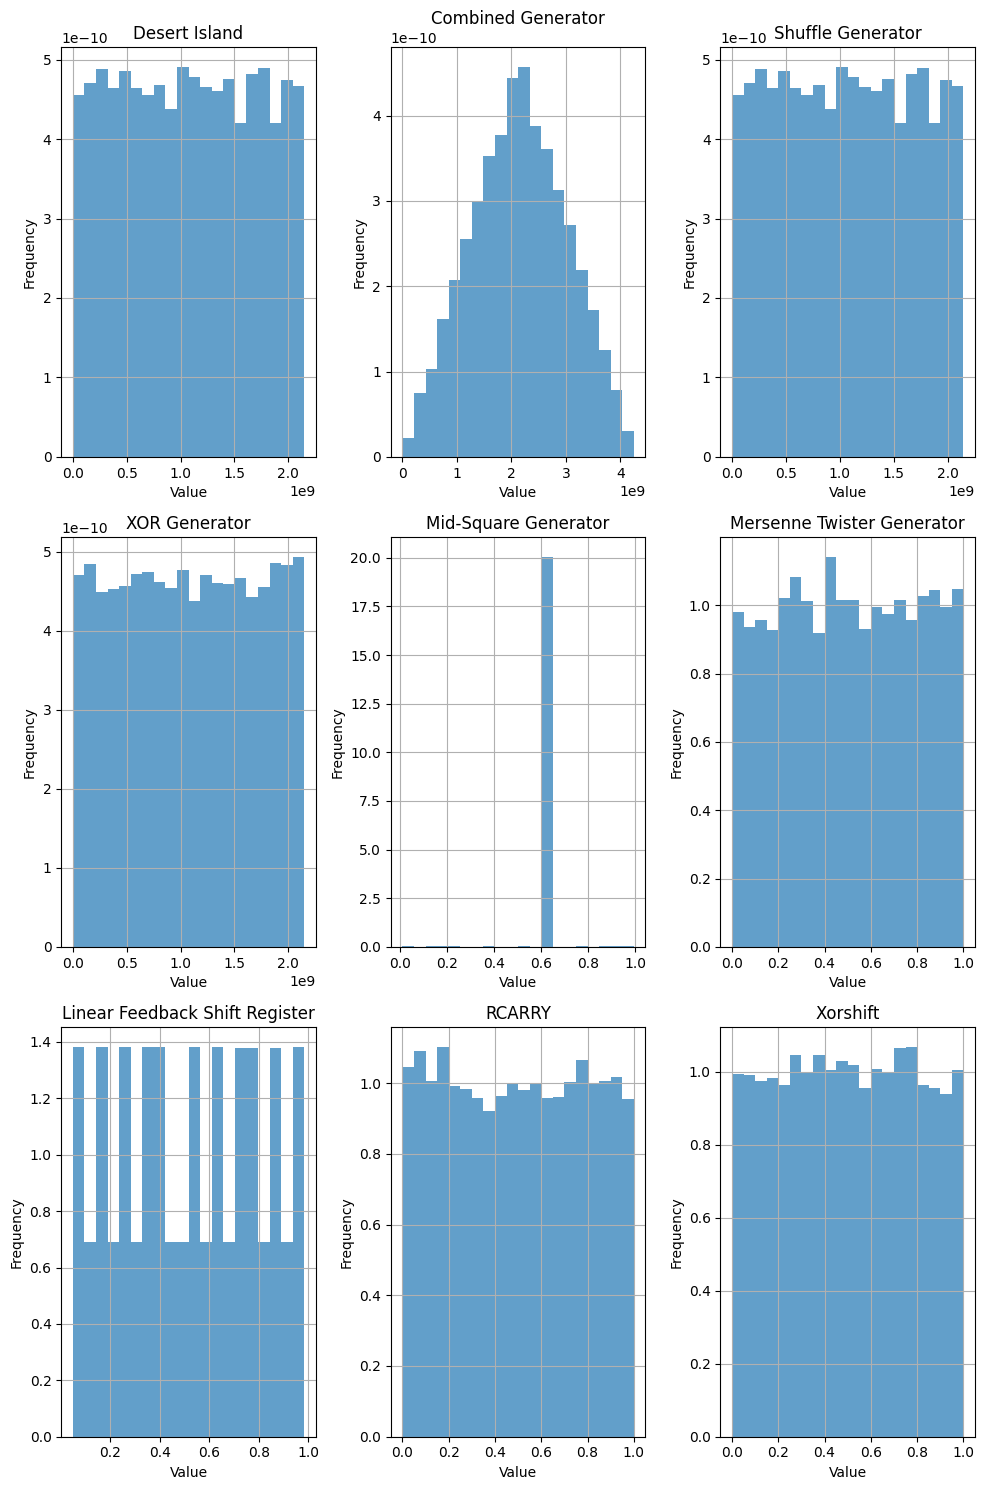

In [ ]:
num_plots = 9
num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 15))

for i, (generator, title) in enumerate(zip(generators, titles)):
    row = i // num_cols
    col = i % num_cols
    data = generator(n)
    axs[row, col].hist(data, bins=20, density=True, alpha=0.7, label=title)
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(title)
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

# Runtime efficiency of the generators

In [ ]:
import time
import numpy as np

# Benchmark function adapted for both generator functions
def benchmark_generator(generator_func, *args):
    start_time = time.time()
    _ = generator_func(*args)  # Generate numbers
    end_time = time.time()
    return end_time - start_time

In [ ]:
n = 100000  # Number of random numbers to generate

results = []

# Benchmark each generator
for generator in generators:
    time_taken = benchmark_generator(generator, n)
    result = {
        'Generator': generator.__name__,
        'Time_taken_seconds': time_taken,
        'Numbers_generated': n
    }
    results.append(result)

df_results = pd.DataFrame(results)

df_results_sorted = df_results.sort_values(by='Time_taken_seconds')

df_results_sorted

,Generator,Time_taken_seconds,Numbers_generated
5,mersenne_generator,0.010958,100000
7,generate_rcarry,0.109045,100000
0,X_generator,0.189285,100000
4,mid_square,0.214629,100000
8,generate_xorshift_sequence,0.221325,100000
1,combined_generator,0.294723,100000
3,XOR_generator,0.307308,100000
2,shuffle_generator,0.326355,100000
6,generate_lsfr,3.182380,100000


<Axes: xlabel='Generator'>

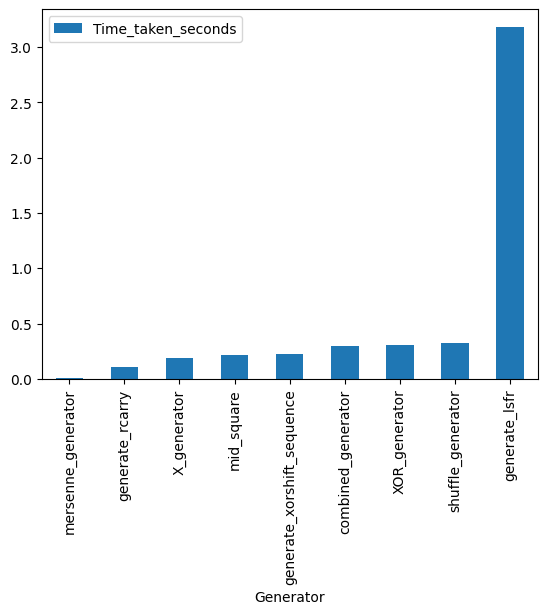

In [ ]:
# @title Time taken by generator

df_results_sorted.plot.bar(x='Generator', y='Time_taken_seconds')